In [869]:
import pandas as pd
from datetime import date

In [870]:
import matplotlib.pyplot as plt
import seaborn as sns

In [871]:
animals = pd.read_csv("project1.csv")
animals.head()

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A680855,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
1,A680857,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
2,A680858,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
3,A680859,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
4,A680860,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black


In [872]:
animals.shape

(131165, 12)

In [873]:
animals.size

1573980

In [874]:
# The shape of the data set is 131165 rows and 12 columns with a total size of 1,563,980 entries
animals.info()
animals.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131165 entries, 0 to 131164
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         131165 non-null  object
 1   Date of Birth     131165 non-null  object
 2   Name              93658 non-null   object
 3   DateTime          131165 non-null  object
 4   MonthYear         131165 non-null  object
 5   Outcome Type      131125 non-null  object
 6   Outcome Subtype   65810 non-null   object
 7   Animal Type       131165 non-null  object
 8   Sex upon Outcome  131165 non-null  object
 9   Age upon Outcome  131165 non-null  object
 10  Breed             131165 non-null  object
 11  Color             131165 non-null  object
dtypes: object(12)
memory usage: 12.0+ MB


17

In [875]:
animals.isnull().sum()

Animal ID               0
Date of Birth           0
Name                37507
DateTime                0
MonthYear               0
Outcome Type           40
Outcome Subtype     65355
Animal Type             0
Sex upon Outcome        0
Age upon Outcome        0
Breed                   0
Color                   0
dtype: int64

In [876]:
# All of the data types are objects (strings) and need to be converted to numerical values for valuable ML results. 
# There are also 17 duplicates among the rows and thus need to be treated. 
# I would convert Date of Birth, DateTime, MonthYear by first converting to datetime. Date of Birth can be converted to age and the rest of the items can be used to extract the day, month, and year
# Animal ID and Name don't really need to be changed and can be eliminated as all IDs are unique and Names don't help analysis to predict the Outcome Type.
# Outcome Type, Outcome Subtype, Animal Type, Sex upon Outcome, Breed, and Color can all be converted to categorial data then use One-hot encoding. 
# Lastly, Age Upon Outcome can be stripped to only a numerical value of days so everything becomes cohesive. 
animals.drop_duplicates(inplace=True, ignore_index=True)
animals.duplicated().sum()
# Lastly the Animal ID column, the Name column should be eliminated as they do not add any value to the analysis as each value are unique or don't affect the analysis numerically.
animals.drop(["Animal ID"], axis = 1, inplace=True)
animals.drop(["Name"], axis = 1, inplace=True)

In [877]:
animals.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131148 entries, 0 to 131147
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date of Birth     131148 non-null  object
 1   DateTime          131148 non-null  object
 2   MonthYear         131148 non-null  object
 3   Outcome Type      131108 non-null  object
 4   Outcome Subtype   65802 non-null   object
 5   Animal Type       131148 non-null  object
 6   Sex upon Outcome  131148 non-null  object
 7   Age upon Outcome  131148 non-null  object
 8   Breed             131148 non-null  object
 9   Color             131148 non-null  object
dtypes: object(10)
memory usage: 10.0+ MB


In [878]:
# Now after removing duplicated rows and useless columns the data types of each column should be converted to useful values.
# Convert DOB to datetime then solve for the age given today's date.
animals["Date of Birth"] = pd.to_datetime(animals["Date of Birth"], format = '%m/%d/%y')
def calc_age(DOB):
    today = date.today()
    age = today.year - DOB.year
    return age 
animals["Age"] = animals["Date of Birth"].apply(calc_age)
animals.drop("Date of Birth", axis = 1, inplace=True)

# Convert MonthYear to datetime then extract month and then year.
animals["MonthYear"] = pd.to_datetime(animals["MonthYear"], format = "%b-%y")
def extract_month(Admit_time):
    return Admit_time.month
def extract_year(Admit_time):
    return Admit_time.year
animals["MonthAdmit"] = animals["MonthYear"].apply(extract_month)
animals["YearAdmit"] = animals["MonthYear"].apply(extract_year)
animals.drop("MonthYear", axis = 1, inplace=True)
             
# Convert Age upon Outcome to days for consistent format. Assume 30 days in a month, 365 days in a year.
def convertdays(OutAge):
    number, category = OutAge.split()
    number = int(number)                  
    if category == "days":
        multiplier = 1
    elif category == "weeks":
        multiplier = 7
    elif category == "months":
        multiplier = 30   
    elif category == "years":
        multiplier = 365  
    else:
        multiplier = 0  
    return multiplier * number
animals["Age upon Outcome (Days)"] = animals["Age upon Outcome"].apply(convertdays)
animals.drop("Age upon Outcome", axis=1, inplace=True)

# Convert DateTime to datetime and extract the time as well as the day since month and year were already extracted
# Code below was generated from Chat GPT 
animals["DateTime"] = pd.to_datetime(animals["DateTime"], format="mixed", errors="coerce", utc=True).dt.tz_convert(None)   

# Now extract date of admit and time since month and year was already extracted from MonthYear
def extract_day(Admit_time):
    return Admit_time.day
def extract_time(Admit_time):
    return Admit_time.time()
animals["DayAdmit"] = animals["DateTime"].apply(extract_day)
animals["TimeAdmit"] = animals["DateTime"].apply(extract_time)
# Drop time as the exact time a animal is admitted is likely not going to affect the outcome type of that individual animal when compared to the year, month, or day 
animals.drop("TimeAdmit", axis = 1, inplace=True)
animals.drop("DateTime", axis = 1, inplace=True)

In [879]:
animals.info()
animals.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131148 entries, 0 to 131147
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Outcome Type             131108 non-null  object
 1   Outcome Subtype          65802 non-null   object
 2   Animal Type              131148 non-null  object
 3   Sex upon Outcome         131148 non-null  object
 4   Breed                    131148 non-null  object
 5   Color                    131148 non-null  object
 6   Age                      131148 non-null  int64 
 7   MonthAdmit               131148 non-null  int64 
 8   YearAdmit                131148 non-null  int64 
 9   Age upon Outcome (Days)  131148 non-null  int64 
 10  DayAdmit                 131148 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 11.0+ MB


,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Breed,Color,Age,MonthAdmit,YearAdmit,Age upon Outcome (Days),DayAdmit
0,Transfer,Partner,Bird,Unknown,Duck,Yellow/Black,11,6,2014,14,10
1,Transfer,Partner,Bird,Unknown,Duck,Yellow/Black,11,6,2014,14,10
2,Transfer,Partner,Bird,Unknown,Duck,Yellow/Black,11,6,2014,14,10
3,Transfer,Partner,Bird,Unknown,Duck,Yellow/Black,11,6,2014,14,10
4,Transfer,Partner,Bird,Unknown,Duck,Yellow/Black,11,6,2014,14,10


<function matplotlib.pyplot.show(close=None, block=None)>

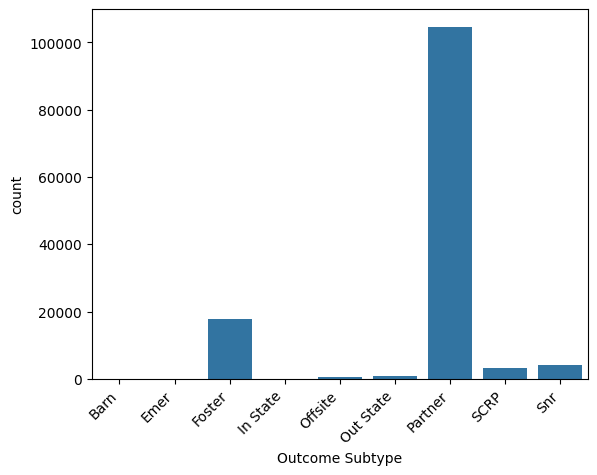

In [880]:
# Before I One-hot Encode my categorical data I will apply univariate analysis
# Now I will convert everything else into categorical data while replacing missing values\
# To replace missing data I will group animals of the same type for replacing missing data with the mode

# Since problem part 2 stated to drop breed I will do it heer
animals.drop("Breed", axis = 1, inplace = True)

animals['Outcome Type'] = animals.groupby(['Animal Type'])['Outcome Type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
animals['Outcome Type'] = animals['Outcome Type'].astype('category') 
animals['Outcome Subtype'] = animals.groupby(['Animal Type'])['Outcome Subtype'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
animals['Outcome Subtype'] = animals['Outcome Subtype'].astype('category')
animals['Color'] = animals['Color'].astype('category')
animals['Animal Type'] = animals['Animal Type'].astype('category')

# I am skipping Color because there are so many entries and cannot be visualized well
sns.countplot(x=animals['Outcome Subtype'])
plt.xticks(rotation=45, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

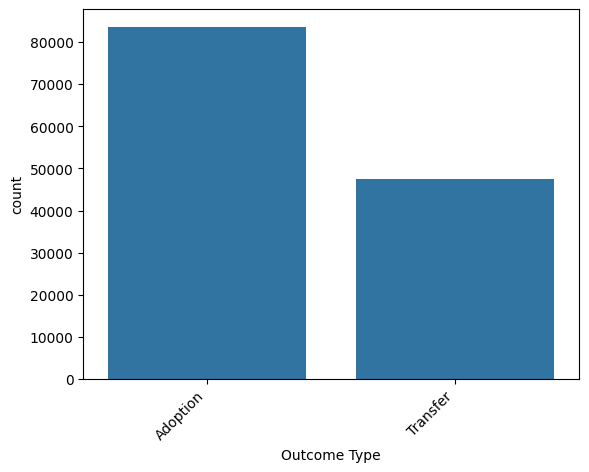

In [881]:
# In the Outcome Subtype count plot I can see that a majority of the animals were able to find a partner and most found a foster. However there are very few animals who have the other outcome subtypes. 
sns.countplot(x=animals['Outcome Type'])
plt.xticks(rotation=45, ha='right')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

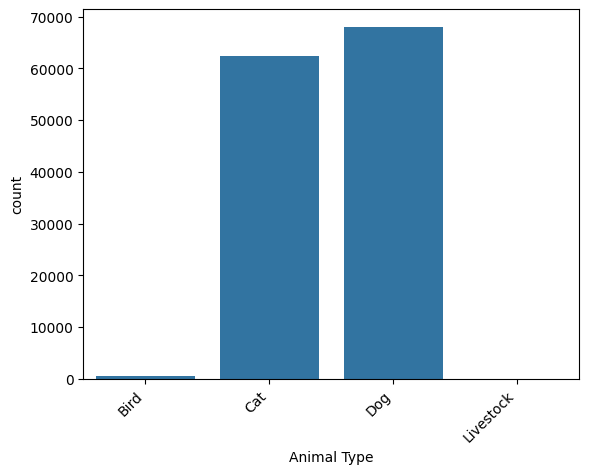

In [882]:
# The Outcome Type count plot shows that the amount of Adoptions is almost double the amount of transfers showign that most animals do get adopted.
sns.countplot(x=animals['Animal Type'])
plt.xticks(rotation=45, ha='right')
plt.show

In [883]:
# For the Animal Type coutplot we can see that most of the animals in the shelter are either cats or dogs. There are no livestock and very few birds.

# Here I will apply One-hot encoding to the data
animals = pd.get_dummies(animals, columns=['Outcome Type'], drop_first=True)

animals = pd.get_dummies(animals, columns=['Outcome Subtype'], drop_first=True)

# Breed is not included as it is stated in part 2 to drop the column
categorical_cols = ['Animal Type', 'Sex upon Outcome', 'Color']
for column in categorical_cols:
    animals = pd.get_dummies(animals, columns=[column], drop_first=True)

In [884]:
animals.info()
animals.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131148 entries, 0 to 131147
Columns: 619 entries, Age to Color_Yellow/Yellow
dtypes: bool(614), int64(5)
memory usage: 81.8 MB


Age                          0
MonthAdmit                   0
YearAdmit                    0
Age upon Outcome (Days)      0
DayAdmit                     0
                            ..
Color_Yellow/Orange Tabby    0
Color_Yellow/Red             0
Color_Yellow/Tan             0
Color_Yellow/White           0
Color_Yellow/Yellow          0
Length: 619, dtype: int64

In [885]:
# Beginning the univariate analysis
animals.describe()

,Age,MonthAdmit,YearAdmit,Age upon Outcome (Days),DayAdmit
count,131148.000000,131148.000000,131148.000000,131148.000000,131148.000000
mean,8.040245,6.755856,2018.587344,518.183998,15.868103
std,4.195992,3.332563,3.318297,900.018042,8.797603
min,0.000000,1.000000,2013.000000,0.000000,1.000000
25%,5.000000,4.000000,2016.000000,14.000000,8.000000
50%,8.000000,7.000000,2018.000000,90.000000,16.000000
75%,11.000000,10.000000,2021.000000,730.000000,23.000000
max,34.000000,12.000000,2025.000000,10950.000000,31.000000


<Axes: xlabel='Age upon Outcome (Days)', ylabel='Count'>

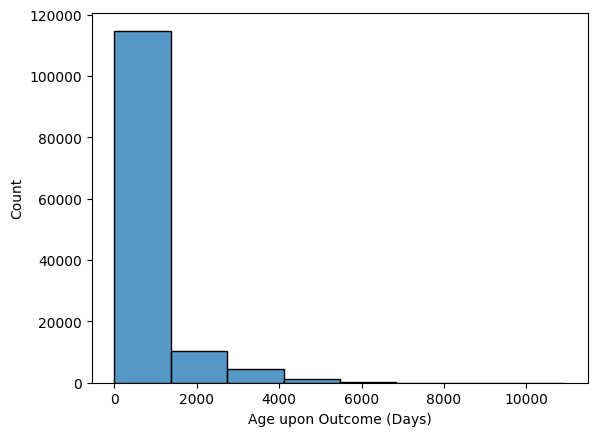

In [886]:
# In the analysis above we can see that in the Age upon Outcome column there is a significant outlier in the max which deviates heavily from the mean. Moreover the standard deviation is immensily high. 
# The average month admitted is around the end of June and we can see that a majority of animals admitted were admitted in the year 2021 or before with a average of 2018. 
# Another significant feature is that the average day admit is in the middle of the month around the 15th or 16th day. 
# In the Age section there exists a outlier in the maximum age admitted which is 34 years old. This deviates heavily from the mean and is certainly a rare occurance. 
sns.histplot(data = animals['Age upon Outcome (Days)'], bins = 8)

<Axes: xlabel='Age upon Outcome (Days)'>

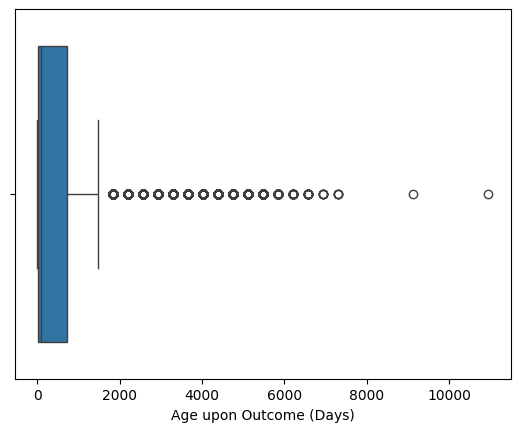

In [887]:
# As we can see in the plot above a majority of the Age upon Outcomes are within the 0 - 2000 range with outliers reaching a extreme outlier at 6000.
sns.boxplot(data=animals, x='Age upon Outcome (Days)')

<Axes: xlabel='Age'>

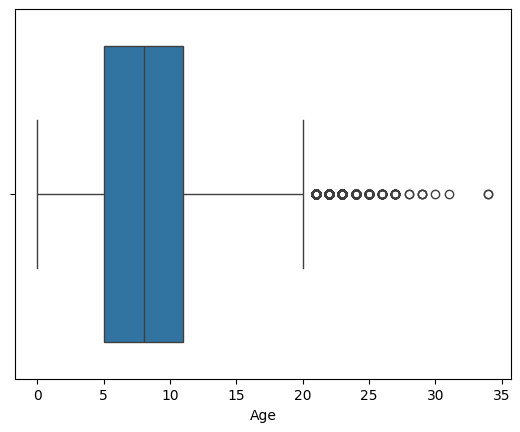

In [888]:
# Using a histogram we get a even better view of the distribution. We see that there are many outliers here which are above the extreme and is skewed towards the lower end of the spectrum. 
sns.boxplot(data=animals, x='Age')

<Axes: xlabel='MonthAdmit'>

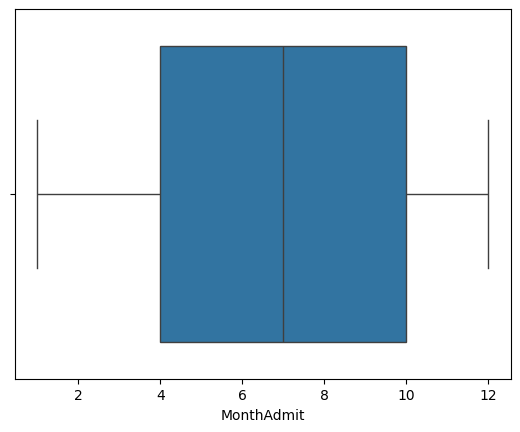

In [889]:
# Taking a look at the histogram for the age of the admits the data is skewed to the left, with many outliers past the 20 year old age mark. A mojority of the age however is concentrated in the 5 to 12 age range. 
sns.boxplot(data=animals, x='MonthAdmit')

In [890]:
# Taking a look at the boxplot of the MonthAdmit we can see a fairly normal distribution with no outliers. This distribution shows that around the middle part of the year is when most animals are admitted to the shelter. 
# This could be because around the new years people buy pets and around the middle of the year they realized they aren't capable of taking care of the pets and near the holidays they are less inclined to admit animals to shelters due to the holiday spirit.